# NO MORE FAKE REVIEWS! - Detecting Computer-Generated Reviews

#### Video Link: https://drive.google.com/file/d/1JYQXf1uN1Q8nS2Oo4tYTjCwAtgDe6-0t/view

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Vrisan Dubey
- Vikram Venkatesh
- Nilay Menon
- Caleb Galdston
- Liam Manatt

# Abstract

Our project focuses on building a model to classify whether online reviews for products are written by real people or are computer generated. Many consumers like ourselves often depend on existing product reviews to determine whether or not to make a purchase, or if a product would be worth our money. It would be extremely disappointing to decide to spend money on something, which ended up being non-real information. Because product reviews play a big role in how consumers make decisions and in the satisfaction people feel from the products they purchase, we ultimately decided to pursue this project. Many sellers and companies, in today’s day, have resorted to computer-generated reviews to bolster up their brand with fake data. And with the recent rise of powerful Large Language Models like ChatGPT that can almost effortlessly generate grammatically coherent sentences, being able to generate fake reviews has never been more accessible. Thus, we set out to determine if we could use certain features of product reviews to successfully predict whether a review is real or computer generated. 

We used a data set containing 40,432 product reviews that are labeled as real or computer generated to perform our analysis and build our models. With appropriate statistical tests, we found that there were significant differences in multiple categories when comparing across real and computer generated reviews. Such categories included review length and sentiment. For example, we found that computer-generated reviews tend to be more positive than original reviews.

Our model-building approach centered around bag of words (BOW) and term frequency-inverse term frequency (TFIDF) techniques. We test multiple tree-based and probabilistic models to see if we could use our features to determine whether a review was real or fake. Our best-performing model, in terms of accuracy, was Multinomial Naive Bayes, which classified reviews on an unseen test set with almost 90 percent accuracy. It was surprising to see that the (relatively) simplest model that we used was able to perform the best.

Note that for the rest of the notebook CR will refer to computer-generated reviews and OR will refer to original reviews. This is also how they are labeled in the data.


# Research Question

Given a product review’s content, are features generated from sentiment analysis, tf-idf, and bag of words models good predictors of whether a review was written by a human or not?



## Background and Prior Work

In today’s internet based world, product reviews, especially the ones online, play a very important role when it comes to consumer purchasing decisions. Such reviews also have a big impact on the reputation of companies selling the products. With reviews being very important, there could be the possibility that people try to game the system by writing fake reviews. The internet has millions if not billions of reviews for products with the number of reviews growing fast everyday.  According to Scott Clark from CMSwire.com, “with the advent of generative AI, fake reviews are becoming more advanced and difficult to detect”.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) As this growth of artificial intelligence continues, so does the possibility of fraudulent reviews generated by bots. We know that there is a possibility of having more fake reviews than real reviews more than ever now due to large language models. With such an important problem, we wanted to see if we are able to classify whether a review is written by a human or not.

With such a pressing topic, there have been many attempts to help combat such reviews. For example, according to a study done by Arjun Muherjee and a couple others, “supervised learning was used with a set of review centric features (e.g., unigrams and review length) and reviewer and product centric features (e.g., average rating, sales rank, etc.) to detect fake reviews” (2). The use of features like n grams are important when trying to predict whether or not a review is fake or real. “An AUC (Area Under the ROC Curve) of 0.78 was reported using logistic regression. The assumption, however, is too restricted for detecting generic fake reviews”.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) This shows that detecting fake reviews might be a bit harder than we initially thought. 

Another study that went into fake review detection using machine learning methods, states that “fake reviews are differentiated from genuine reviews using four linguistic clues like level of detail, understandability, cognition indicators and writing style”.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) Using features like case of letters, things like if a word was a feeling word, and the words part of speech, the people in the study were able to use machine learning algorithms like logistic regression to classify if a review was genuine or not. However, even these researchers found it difficult to reach a high level of accuracy due to things like the fabricated review being very close to what is considered to be a genuine review. 

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Clark, Scott. "How to Spot and Combat Fake Reviews and Bots." *CMSWIRE*, (18 Oct 2023). https://www.cmswire.com/customer-experience/how-to-spot-and-combat-fake-reviews-and-bots/
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Mukherjee, Arjun et al. “Fake Review Detection : Classification and Analysis of Real and Pseudo Reviews.” (2013). https://www2.cs.uh.edu/~arjun/papers/UIC-CS-TR-yelp-spam.pdf
3. <a name="cite_note-3"></a> [^](#cite_ref-3) N. A. Patel and R. Patel, "A Survey on Fake Review Detection using Machine Learning Techniques," *2018 4th International Conference on Computing Communication and Automation (ICCCA)*, Greater Noida, India, (2018). https://ieeexplore.ieee.org/abstract/document/8777594


# Hypothesis


Given text data of a product review, we hypothesize that our model can accurately predict whether a review was written by a human or not. We believe that certain features extracted from the review content, such as sentiment scores, term frequency-inverse document frequency (tf-idf) values, and bag of words representations, will reveal unique, identifiable patterns in human written and automated reviews. By training on a large dataset, we expect our model to learn and use these features to differentiate between human written and generated reviews.

# Data

## Fake Reviews Dataset

## Data overview
- Dataset #1
  - Dataset Name: Fake Reviews Dataset
  - Link to the dataset: https://www.kaggle.com/datasets/mexwell/fake-reviews-dataset
  - Number of observations: 40432
  - Number of variables: 4

Our dataset is relatively simple as it just contains only a few features - the text contents of the review (stored as string), the review's rating (ordinal variable between 1 and 5, stored as float), and the review's category (stored as string). The target variable labels the review as either Computer Generated ('CG') or Original Review ('O'G). Our dataset does not have any missing values so most of our data cleaning involves little tasks like making the column names and features more intuitive (for readability purposes). We also have to preprocess the text column to make it usable in our analysis, which includes making the text universally lowercase and removing stopwords and punctuation. However, we will keep the original reviews (with stopwords and punctuation) in case it has some meaning later down in our analysis.

In [1]:
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
from wordcloud import WordCloud
from textblob import TextBlob


sns.set_theme()

stopwords = set(stopwords.words('english'))


from scipy import stats
from scipy.stats import ks_2samp


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, precision_recall_fscore_support
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/vrisandubey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vrisandubey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/vrisandubey/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vrisandubey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/vrisandubey/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
reviews_df = pd.read_csv('data/fake_reviews.csv')
reviews_df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


# Results

## Exploratory Data Analysis

### Section 1 of EDA - Exploring Basic Properties of the Dataset

In [3]:
reviews_df.dtypes

category     object
rating      float64
label        object
text_        object
dtype: object

Explore the data types in our data set. Rating is the only float value while the rest are objects (strings). 

In [4]:
reviews_df.label.unique()

array(['CG', 'OR'], dtype=object)

There are two unique labels that an entry in our dataset can have, 'CG' or 'OR'. 'CG' represents a computer generated review while 'OR' represents an original (real) review. 

In [5]:
reviews_df.isna().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

Our dataset has no null values : )

In [6]:
reviews_df.category.unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

These are the categories that a review can fall under.

In [7]:
reviews_df['rating'].unique()

array([5., 1., 3., 2., 4.])

There are five different ratings that a review can have from 1-5. 

In [8]:
group_rating = reviews_df.groupby('label')['rating'].mean()
group_rating

label
CG    4.259893
OR    4.253265
Name: rating, dtype: float64

It seems that the average ratings between fake reviews and real reviews are very similar. 

In [9]:
# Formatting the names of the columns better and changing the ratings column from floats to integers
reviews_df = reviews_df.rename(columns = {'text_': 'text'})
reviews_df['category'] = reviews_df['category'].apply(lambda s: s[:-2].replace('_', ' '))
reviews_df['rating'] = reviews_df['rating'].astype(int)

In [10]:
# add a column with the stop words for each review removed and the punctuation for each review removed
reviews_df['text_no_stop'] = reviews_df['text'].apply(lambda s: ' '.join([token for token in word_tokenize(s.lower()) if token not in stopwords]))
reviews_df['text_no_punct'] = reviews_df['text'].apply(lambda s: s.lower().translate(str.maketrans('', '', string.punctuation)))
reviews_df.head()

,category,rating,label,text,text_no_stop,text_no_punct
0,Home and Kitchen,5,CG,"Love this! Well made, sturdy, and very comfor...","love ! well made , sturdy , comfortable . love...",love this well made sturdy and very comfortab...
1,Home and Kitchen,5,CG,"love it, a great upgrade from the original. I...","love , great upgrade original . 've mine coupl...",love it a great upgrade from the original ive...
2,Home and Kitchen,5,CG,This pillow saved my back. I love the look and...,pillow saved back . love look feel pillow .,this pillow saved my back i love the look and ...
3,Home and Kitchen,1,CG,"Missing information on how to use it, but it i...","missing information use , great product price !",missing information on how to use it but it is...
4,Home and Kitchen,5,CG,Very nice set. Good quality. We have had the s...,nice set . good quality . set two months,very nice set good quality we have had the set...


In [12]:
# Here we tokenize the words, making each word a unit, remove stop words (common words that don't differentiate the text well)
# Next we lemmatize the words, meaning break them down into their root meaning, thus words that come from the same root will be treated as the same
def preprocess_text(s):
    tokens = word_tokenize(s.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [13]:
# creates a new column called lemma_text that applies the preprocess_text function to the text_no_punct column
reviews_df['lemma_text'] = reviews_df['text_no_punct'].apply(preprocess_text)

In [14]:
# Assign the negative, positive, neutral, and composite sentiment values to columns
sent_analyzer = SentimentIntensityAnalyzer()
reviews_df['sentiment'] = reviews_df['lemma_text'].apply(lambda s: sent_analyzer.polarity_scores(s))
reviews_df['neg_sentiment'] = reviews_df.sentiment.apply(lambda dc: dc['neg'])
reviews_df['pos_sentiment'] = reviews_df.sentiment.apply(lambda dc: dc['pos'])
reviews_df['neu_sentiment'] = reviews_df.sentiment.apply(lambda dc: dc['neu'])
reviews_df['comp_sentiment'] = reviews_df.sentiment.apply(lambda dc: dc['compound'])

reviews_df.head()

,category,rating,label,text,text_no_stop,text_no_punct,lemma_text,sentiment,neg_sentiment,pos_sentiment,neu_sentiment,comp_sentiment
0,Home and Kitchen,5,CG,"Love this! Well made, sturdy, and very comfor...","love ! well made , sturdy , comfortable . love...",love this well made sturdy and very comfortab...,love well made sturdy comfortable love itvery ...,"{'neg': 0.0, 'neu': 0.15, 'pos': 0.85, 'compou...",0.000,0.850,0.150,0.9517
1,Home and Kitchen,5,CG,"love it, a great upgrade from the original. I...","love , great upgrade original . 've mine coupl...",love it a great upgrade from the original ive...,love great upgrade original ive mine couple year,"{'neg': 0.0, 'neu': 0.321, 'pos': 0.679, 'comp...",0.000,0.679,0.321,0.8910
2,Home and Kitchen,5,CG,This pillow saved my back. I love the look and...,pillow saved back . love look feel pillow .,this pillow saved my back i love the look and ...,pillow saved back love look feel pillow,"{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'comp...",0.000,0.583,0.417,0.7906
3,Home and Kitchen,1,CG,"Missing information on how to use it, but it i...","missing information use , great product price !",missing information on how to use it but it is...,missing information use great product price,"{'neg': 0.214, 'neu': 0.388, 'pos': 0.398, 'co...",0.214,0.398,0.388,0.4404
4,Home and Kitchen,5,CG,Very nice set. Good quality. We have had the s...,nice set . good quality . set two months,very nice set good quality we have had the set...,nice set good quality set two month,"{'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp...",0.000,0.533,0.467,0.6908


In [15]:
# adds a column this the number of words in each review without punctuation
reviews_df['num_words'] = reviews_df['text_no_punct'].apply(lambda s: len(s.split(' ')))
# finds the average num of words in reviews grouped by whether the review is computer generated or not
review_len_per_group = reviews_df.groupby('label')['num_words'].mean()
review_len_per_group

label
CG    62.784032
OR    74.321231
Name: num_words, dtype: float64

Based on initial observation, it appears that the computer generated reviews are shorter, on average, than the real reviews. 

Amount of punctuation used standardized by number of words between original and computer generated reviews

In [16]:
def count_punc(text):
    count = 0
    for i in text:
        if i in string.punctuation:
            count += 1
    return count

reviews_df['num_punc_stand'] = reviews_df['text'].apply(count_punc) / reviews_df['num_words']
num_punc_per_group = reviews_df.groupby('label')['num_punc_stand'].mean()
num_punc_per_group

label
CG    0.150475
OR    0.160492
Name: num_punc_stand, dtype: float64

Based on initial observation, it appears that the computer generated reviews use less punctuation, on average when standardized by the number of words, than the real reviews. 

### Section 2 of EDA - Visualizing the Data

In [19]:
# Generates a graphic where word size is based on number of occurences
def plot_word_cloud(words_ser, title):
    all_words = (" ".join(words_ser) + ' ').replace('  ', ' ')
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(all_words)

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title)

    plt.show() 

In [20]:
# create new dataframes based on whether the reviews are computer generated or real to use for plotting
cg_reviews = reviews_df[reviews_df.label == 'CG']
or_reviews = reviews_df[reviews_df.label == 'OR']

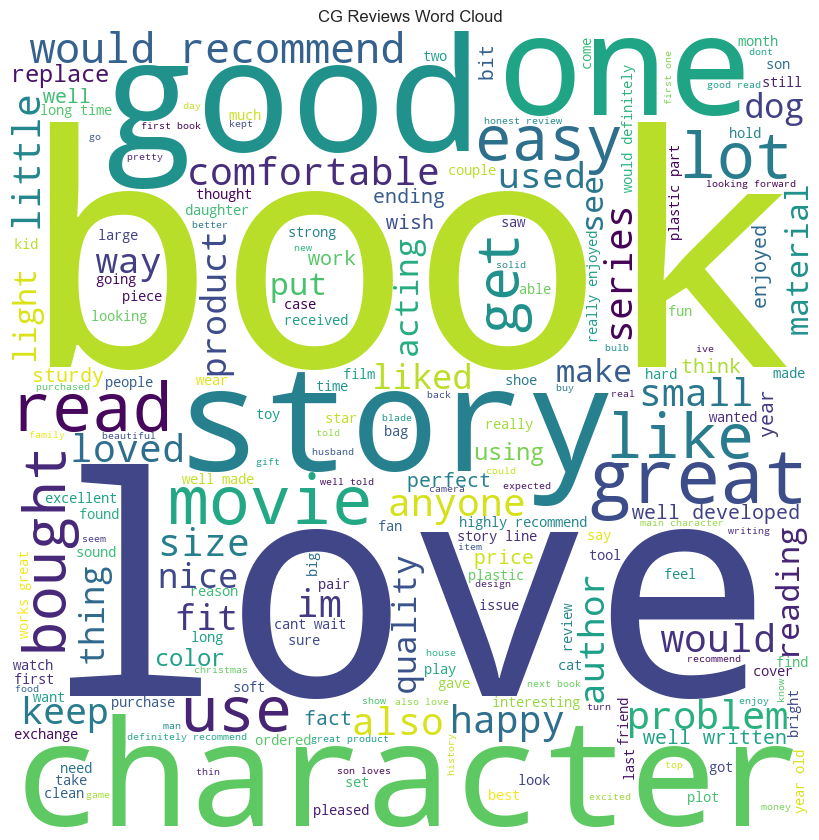

In [21]:
# computer generated word cloud
fake_reviews = cg_reviews.text_no_punct
plot_word_cloud(fake_reviews, title='CG Reviews Word Cloud')

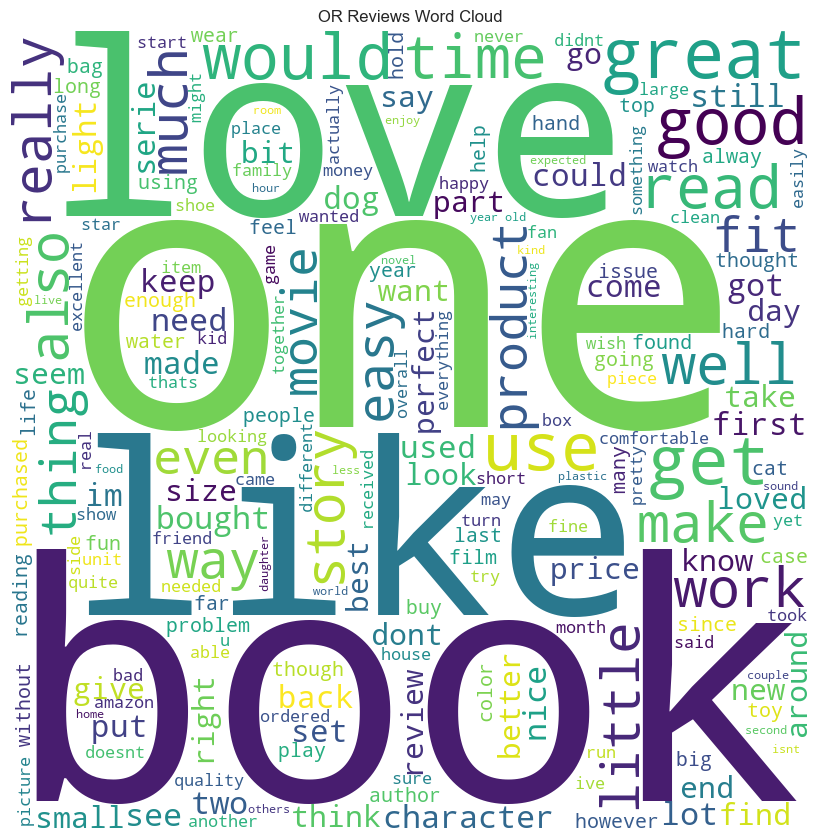

In [22]:
# human review word cloud 
real_reviews = or_reviews.text_no_punct
plot_word_cloud(real_reviews, title='OR Reviews Word Cloud')

From the word clouds, we can see that a lot of the most frequently used words are common among the whole dataset, the computer generated reviews, and the original reviews. However, we do see some notable differences. The word “one” appears much more in original reviews than in other subsets of the data. We hope that differences like these can help us in a bag of words or TFIDF approach in our model building.

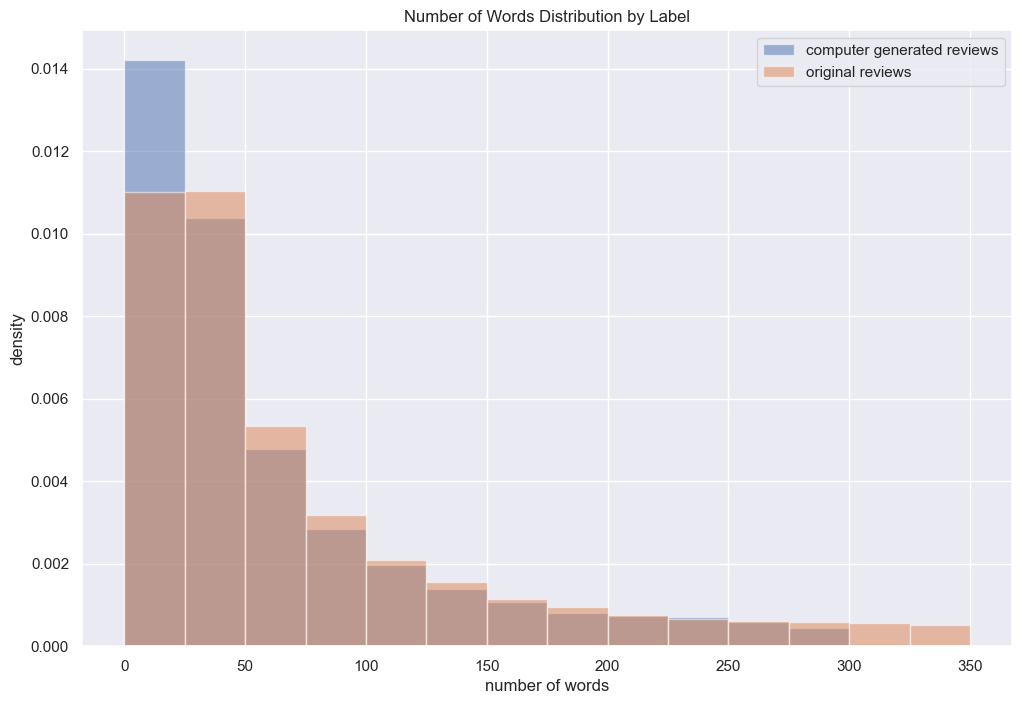

In [28]:
bins = np.arange(0, 375, 25)
plt.figure(figsize=(12, 8))
plt.hist(cg_reviews.num_words,
         label = 'computer generated reviews',
         alpha = 0.5,
         bins = bins,
         density=True)

plt.hist(or_reviews.num_words,
         label = 'original reviews',
         alpha = 0.5,
         bins = bins,
         density=True)

plt.legend()
plt.xlabel('number of words')
plt.ylabel('density')
plt.title('Number of Words Distribution by Label')
plt.show()

The histogram above shows the distribution of the number of words for both the computer generated reviews and original reviews. Both are heavily skewed right. Some differences are also apparent between the two distributions, such as the OR reviews distribution has a longer tail, smaller peak. To test whether these distributions are significant, we run the KS test below.

In [25]:
print(f'Median num words (CG): {cg_reviews.num_words.median()}')
print(f'Median num words (OR): {or_reviews.num_words.median()}')
print()

Median num words (CG): 36.0
Median num words (OR): 43.0



We can see from the median number of words that there could be reason to believe that original reviews are longer than computer generated reviews. So we define the following hypotheses.

$H_0$: The distribution of the number of words per review for CG reviews is the same as the distribution of the number of words per view for OR reviews.

$H_A$: The distribution of the number of words per review for CG reviews is not only different from the distribution of the number of words per view for OR reviews but also less.

Because of the non-parametric nature of the KS test, there are little to no assumptions that need to be tested for our data.

In [26]:
#testing if original reviews have more words than computer generated reviews
res = ks_2samp(cg_reviews.num_words, or_reviews.num_words, alternative='greater')

print(f'Test Stat: {res[0]}')
print(f'P-value: {res[1]}')

Test Stat: 0.09131381084289672
P-value: 5.6671608178102464e-74


The extremely low p-value obtained from running a KS test on the distrubtions of the number of words in computer generated reviews and real reviews indicates that there is a statistically significant difference between the number of words in each type of review. The test tells us that we should reject the null hypothesis and believe the alternative. It appears that there are more words in real reviews than computer generated reviews.

In [27]:
# categorizes reviews based on overall sentiment
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
reviews_df['sentiment_category'] = reviews_df['text'].apply(get_sentiment)

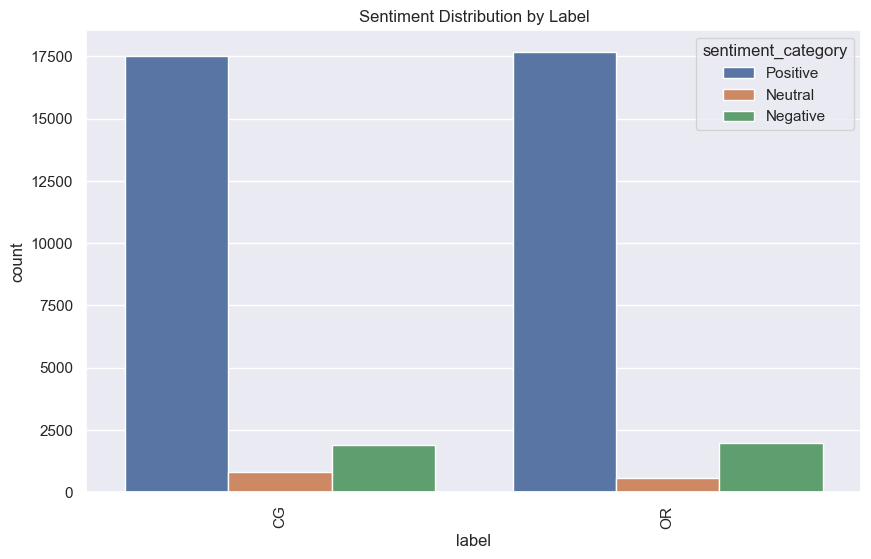

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', hue='sentiment_category', data=reviews_df)
plt.title('Sentiment Distribution by Label')
plt.xticks(rotation=90)
plt.show()

Based on the barplot above, it seems that the fake reviews and real reviews have fairly similar distributions of overall sentiment. They are both heavily skewed towards positive sentiment.

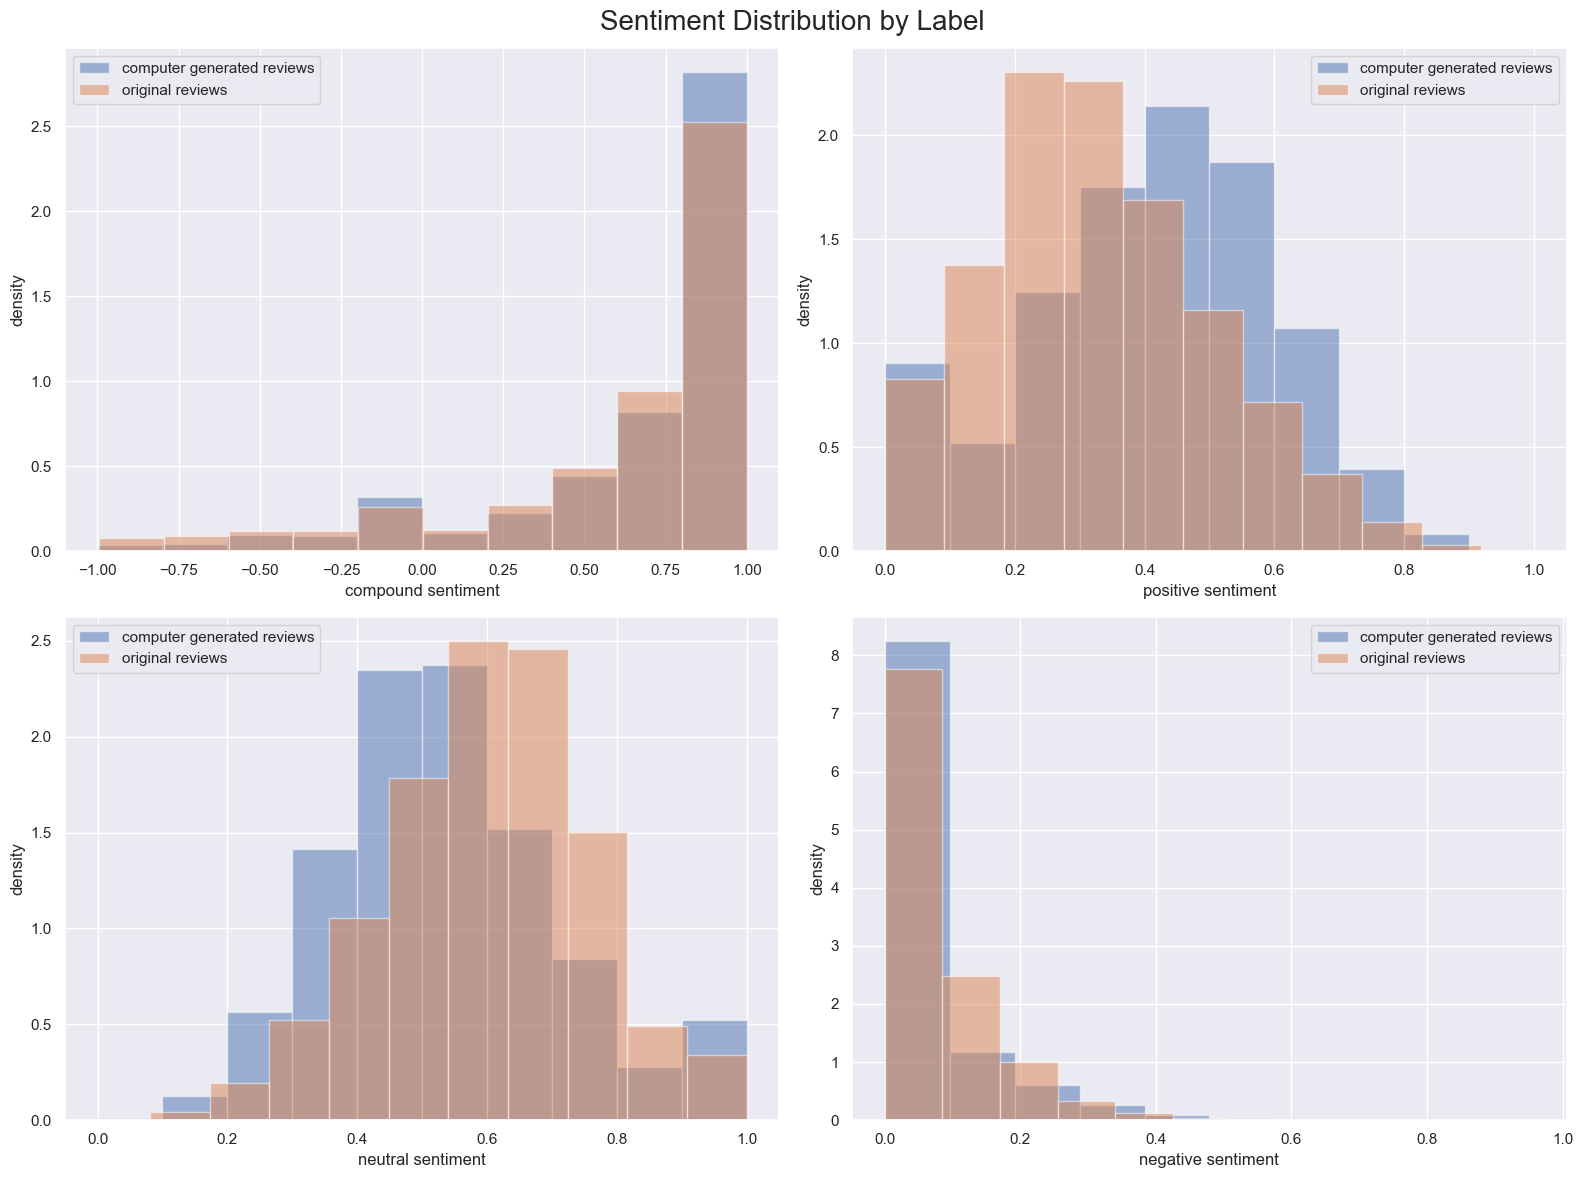

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].hist(cg_reviews.comp_sentiment, alpha=0.5, label='computer generated reviews', density=True)
axes[0, 0].hist(or_reviews.comp_sentiment, alpha=0.5, label='original reviews', density=True)
axes[0, 0].set_xlabel('compound sentiment')
axes[0, 0].set_ylabel('density')
axes[0, 0].legend()

axes[0, 1].hist(cg_reviews.pos_sentiment, alpha=0.5, label='computer generated reviews', density=True)
axes[0, 1].hist(or_reviews.pos_sentiment, alpha=0.5, label='original reviews', density=True)
axes[0, 1].set_xlabel('positive sentiment')
axes[0, 1].set_ylabel('density')
axes[0, 1].legend()

axes[1, 0].hist(cg_reviews.neu_sentiment, alpha=0.5, label='computer generated reviews', density=True)
axes[1, 0].hist(or_reviews.neu_sentiment, alpha=0.5, label='original reviews', density=True)
axes[1, 0].set_xlabel('neutral sentiment')
axes[1, 0].set_ylabel('density')
axes[1, 0].legend()

axes[1, 1].hist(cg_reviews.neg_sentiment, alpha=0.5, label='computer generated reviews', density=True)
axes[1, 1].hist(or_reviews.neg_sentiment, alpha=0.5, label='original reviews', density=True)
axes[1, 1].set_xlabel('negative sentiment')
axes[1, 1].set_ylabel('density')
axes[1, 1].legend()

fig.suptitle('Sentiment Distribution by Label', fontsize=20)
plt.tight_layout()
plt.show()

We used ntlk’s Sentiment Intensity Analyzer to generate sentiment scores for each review. The analyzer outputs a 4 scores for each review: negative, positive, neutral, and compound - each that gives the intensity of that sentiment. Positive, negative, and neutral are on a scale from 0 to 1, with larger values corresponding to stronger sentiment. Compound is on a scale from -1 to 1 with -1 being negative and 1 being positive.
1. Compound sentiment: To the eye, the distributions look pretty similar across CG reviews and OR reviews. Both distributions are skewed left, favoring more positive reviews. 
2. Positive sentiment: Computer generated reviews look to be more positive, on average, than original reviews, as the orange distribution looks to be shifted left when compared to the blue. This distribution looks much more close to normal than the compound sentiment.
3. Neutral sentiment: Same takeaways are the positive sentiment as the original reviews seem to be more neutral than the computer generated reviews.
4. Negative sentiment: The distributions here are heavily skewed right which shows that there are not a lot of reviews with heavy negative sentiment. It is difficult to make out a significant difference visually. 

We will test the above distributions for significant differences using an appropriate test.


We will perform a KS test for compound sentiment:

$H_0$: The distribution of compound sentiment for CG reviews is the same as the distribution of compound sentiment for OR reviews.

$H_A$: The distribution of compound sentiment for CG reviews is not only different from the distribution of compound sentiment for OR reviews but also greater.

In [36]:
print(f'Median compound sentiment (CG): {cg_reviews.comp_sentiment.median()}')
print(f'Median compound sentiment (OR): {or_reviews.comp_sentiment.median()}')
print()

#testing if computer-generated reviews have more compound sentiment than original reviews
res = ks_2samp(cg_reviews.comp_sentiment, or_reviews.comp_sentiment, alternative='less')

print(f'Test Stat: {res[0]}')
print(f'P-value: {res[1]}')

Median compound sentiment (CG): 0.8481
Median compound sentiment (OR): 0.802

Test Stat: 0.10551048674317365
P-value: 1.638793668989301e-98


The extremely low p-value obtained from running a KS test on the distributions of compound sentiment between computer generated and real reviews indicates that there is a statistically significant difference between the compound sentiment in computer generated reviews and real reviews so we should reject the null hypothesis and instead believe the alternative. It appears that real reviews have lower compound sentiment than computer generated reviews. 

Next, we conduct a Two-Sample T-Test for Positive Sentiment:

$H_0$: The distribution of positive sentiment for CG reviews is the same as the distribution of positive sentiment for OR reviews.

$H_A$: The distribution of positive sentiment for CG reviews is not only different from the distribution of positive sentiment for OR reviews but also greater.

Assumptions for Two-Sample T-Test for Positive Sentiment Between Labels: We assume that the values in each group are independent of each other. We think this is a valid assumption because one product’s review will likely not be dependent on another’s. The data in the two groups appear to be roughly normally distributed (see histogram above). The data also appears to have similar variances  

In [37]:
cg_pos = cg_reviews.pos_sentiment.values
or_pos = or_reviews.pos_sentiment.values

pos_t_val, pos_p_val = stats.ttest_ind(cg_pos, or_pos, alternative='less')

print(f'Test Stat: {pos_t_val}')
print(f'P-value: {pos_p_val}')

Test Stat: 43.35145021054243
P-value: 1.0


The extremely low p-value obtained from running a two sample t-test on the distributions of positive sentiment between computer generated and real reviews indicates that there is a statistically significant difference between the positive sentiment in computer generated reviews and real reviews so we should reject the null hypothesis and instead believe the alternative. It appears that real reviews have lower positive sentiment than computer generated reviews. 

Again, we conduct a Two-Sample T-Test for Neutral Sentiment.

$H_0$: The distribution of neutral sentiment for CG reviews is the same as the distribution of negative sentiment for OR reviews.

$H_A$: The distribution of neutral sentiment for CG reviews is not only different from the distribution of negative sentiment for OR reviews but also less.

Assumptions for Two-Sample T-Test for Neutral Sentiment Between Labels: We assume that the values in each group are independent of each other. We think this is a valid assumption because one product’s review will likely not be dependent on another’s. The data in the two groups appear to be roughly normally distributed (see histogram above). The data also appears to have similar variances.

In [38]:
cg_neu = cg_reviews.neu_sentiment.values
or_neu = or_reviews.neu_sentiment.values

neu_t_val, neu_p_val = stats.ttest_ind(cg_neu, or_neu, alternative='greater')

print(f'Test Stat: {neu_t_val}')
print(f'P-value: {neu_p_val}')

Test Stat: -38.29325680204358
P-value: 1.0


The extremely low p-value obtained from running a two sample t-test on the distributions of neutral sentiment between computer generated and real reviews indicates that there is a statistically significant difference between the neutral sentiment in computer generated reviews and real reviews so we should reject the null hypothesis and instead believe the alternative. It appears that real reviews have greater neutral sentiment than computer generated reviews. 

Finally, we conduct a Kolmogorov-Smirnov test for Negative Sentiment:

$H_0$: The distribution of negative sentiment for CG reviews is the same as the distribution of negative sentiment for OR reviews.

$H_A$: The distribution of negative sentiment for CG reviews is not only different from the distribution of negative sentiment for OR reviews but also greater.

In [39]:
print(f'Median negative sentiment (CG): {cg_reviews.neg_sentiment.median()}')
print(f'Median negative sentiment (OR): {or_reviews.neg_sentiment.median()}')
print()

#testing if computer-generated reviews have less negative sentiment than original reviews
res = ks_2samp(cg_reviews.neg_sentiment, or_reviews.neg_sentiment, alternative='greater')

print(f'Test Stat: {res[0]}')
print(f'P-value: {res[1]}')

Median negative sentiment (CG): 0.0
Median negative sentiment (OR): 0.036

Test Stat: 0.16373169766521567
P-value: 3.6489190646592793e-236


Once again, the extremely low p-value obtained from running a KS test on the distributions of negative sentiment between computer generated and real reviews indicates that there is a statistically significant difference between the negative sentiment in computer generated reviews and real reviews so we should reject the null hypothesis and instead believe the alternative. It appears that real reviews have greater negative sentiment than computer generated reviews. 

Something we realized through a quick scan of the data early on was that the sentiment of the review did not match the rating for computer generated reviews. For example, a review would talk super highly about a product and then only give it a 2/5. We wanted to explore this by visualizing the distribution of sentiment by rating for the CG reviews and the OR reviews. What we would expect is that as the rating increases, the rating should become more positive (or less negative).

In [41]:
def plot_sentiment_by_rating(emotion, title):
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    sns.boxplot(ax=axes[0], x='rating', y=f'{emotion}_sentiment', data=or_reviews, hue='rating', legend=False, palette=sns.color_palette())
    axes[0].set_title('OR Reviews')

    sns.boxplot(ax=axes[1], x='rating', y=f'{emotion}_sentiment', data=cg_reviews, hue='rating', legend=False, palette=sns.color_palette())
    axes[1].set_title('CG Reviews')

    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.show() 

/var/folders/7g/_rr8_gwn7374lww7jr31vz080000gn/T/ipykernel_88554/1419900677.py:4: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(ax=axes[0], x='rating', y=f'{emotion}_sentiment', data=or_reviews, hue='rating', legend=False, palette=sns.color_palette())
/var/folders/7g/_rr8_gwn7374lww7jr31vz080000gn/T/ipykernel_88554/1419900677.py:7: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(ax=axes[1], x='rating', y=f'{emotion}_sentiment', data=cg_reviews, hue='rating', legend=False, palette=sns.color_palette())


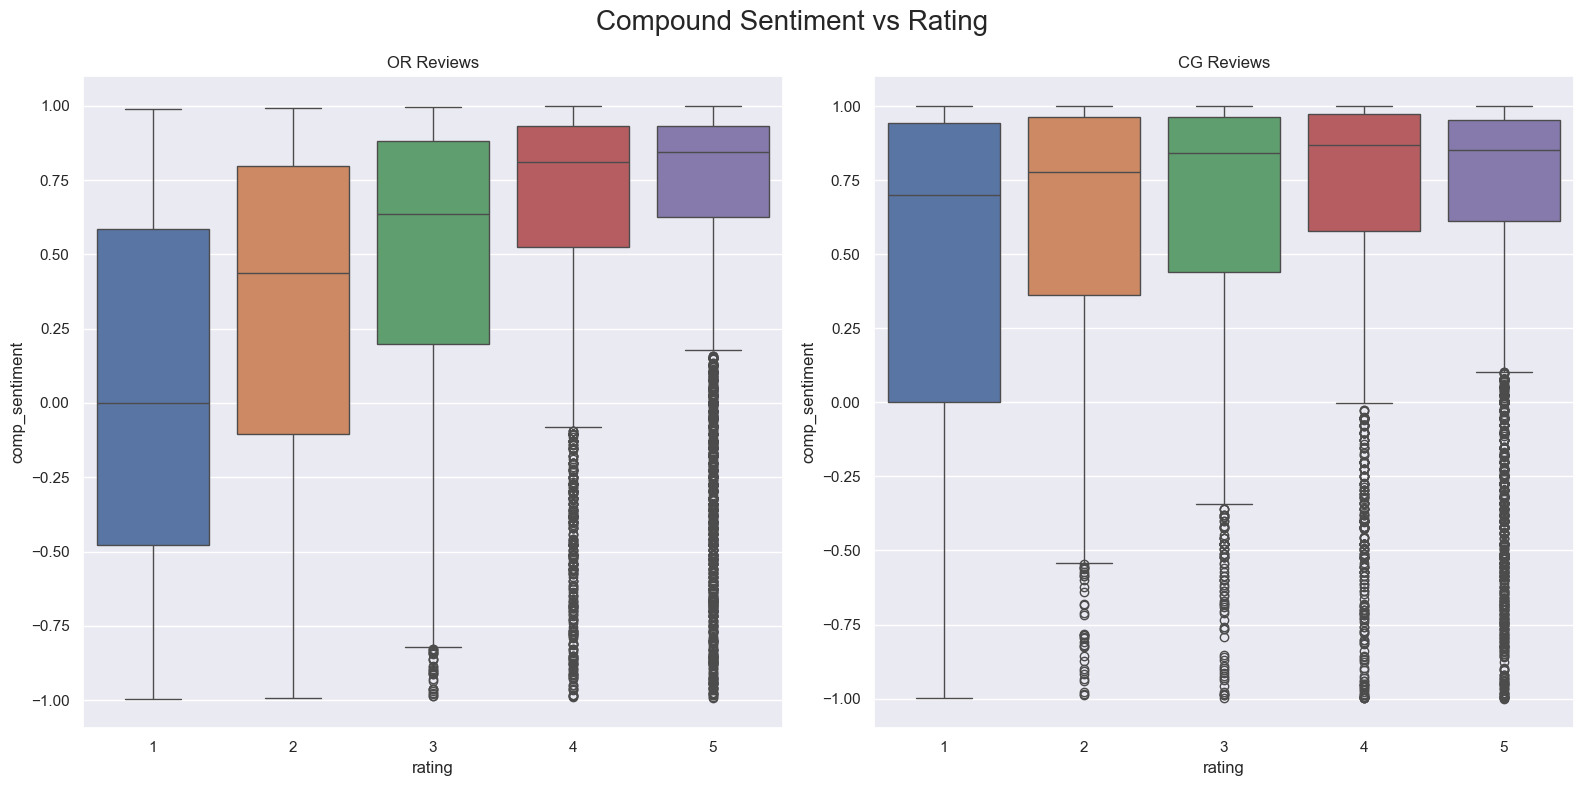

In [42]:
plot_sentiment_by_rating('comp', title='Compound Sentiment vs Rating')

/var/folders/7g/_rr8_gwn7374lww7jr31vz080000gn/T/ipykernel_88554/1419900677.py:4: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(ax=axes[0], x='rating', y=f'{emotion}_sentiment', data=or_reviews, hue='rating', legend=False, palette=sns.color_palette())
/var/folders/7g/_rr8_gwn7374lww7jr31vz080000gn/T/ipykernel_88554/1419900677.py:7: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(ax=axes[1], x='rating', y=f'{emotion}_sentiment', data=cg_reviews, hue='rating', legend=False, palette=sns.color_palette())


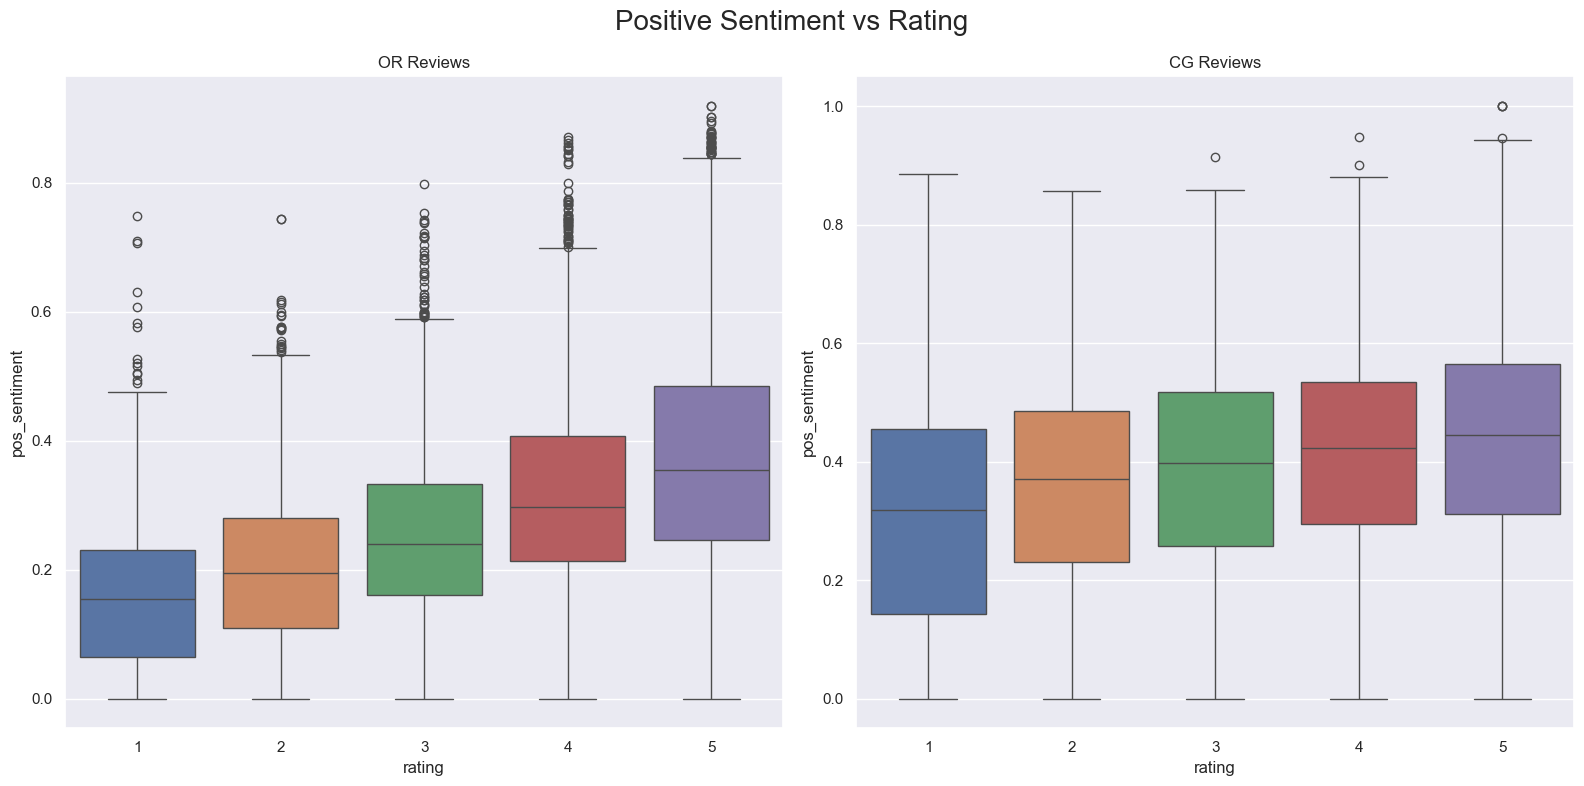

In [43]:
plot_sentiment_by_rating('pos', title='Positive Sentiment vs Rating')

/var/folders/7g/_rr8_gwn7374lww7jr31vz080000gn/T/ipykernel_88554/1419900677.py:4: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(ax=axes[0], x='rating', y=f'{emotion}_sentiment', data=or_reviews, hue='rating', legend=False, palette=sns.color_palette())
/var/folders/7g/_rr8_gwn7374lww7jr31vz080000gn/T/ipykernel_88554/1419900677.py:7: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(ax=axes[1], x='rating', y=f'{emotion}_sentiment', data=cg_reviews, hue='rating', legend=False, palette=sns.color_palette())


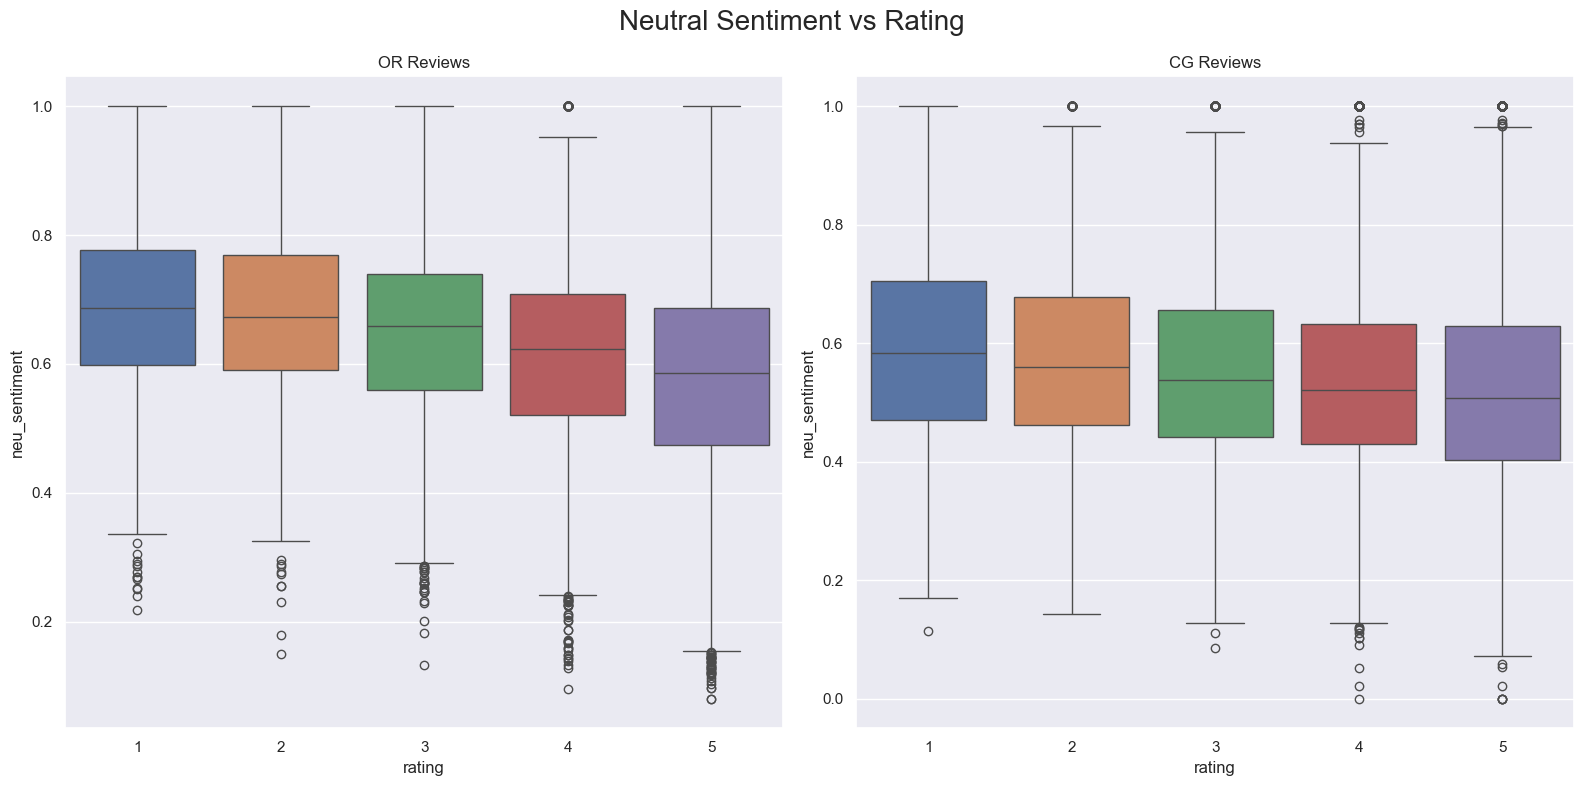

In [44]:
plot_sentiment_by_rating('neu', title='Neutral Sentiment vs Rating')

/var/folders/7g/_rr8_gwn7374lww7jr31vz080000gn/T/ipykernel_88554/1419900677.py:4: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(ax=axes[0], x='rating', y=f'{emotion}_sentiment', data=or_reviews, hue='rating', legend=False, palette=sns.color_palette())
/var/folders/7g/_rr8_gwn7374lww7jr31vz080000gn/T/ipykernel_88554/1419900677.py:7: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(ax=axes[1], x='rating', y=f'{emotion}_sentiment', data=cg_reviews, hue='rating', legend=False, palette=sns.color_palette())


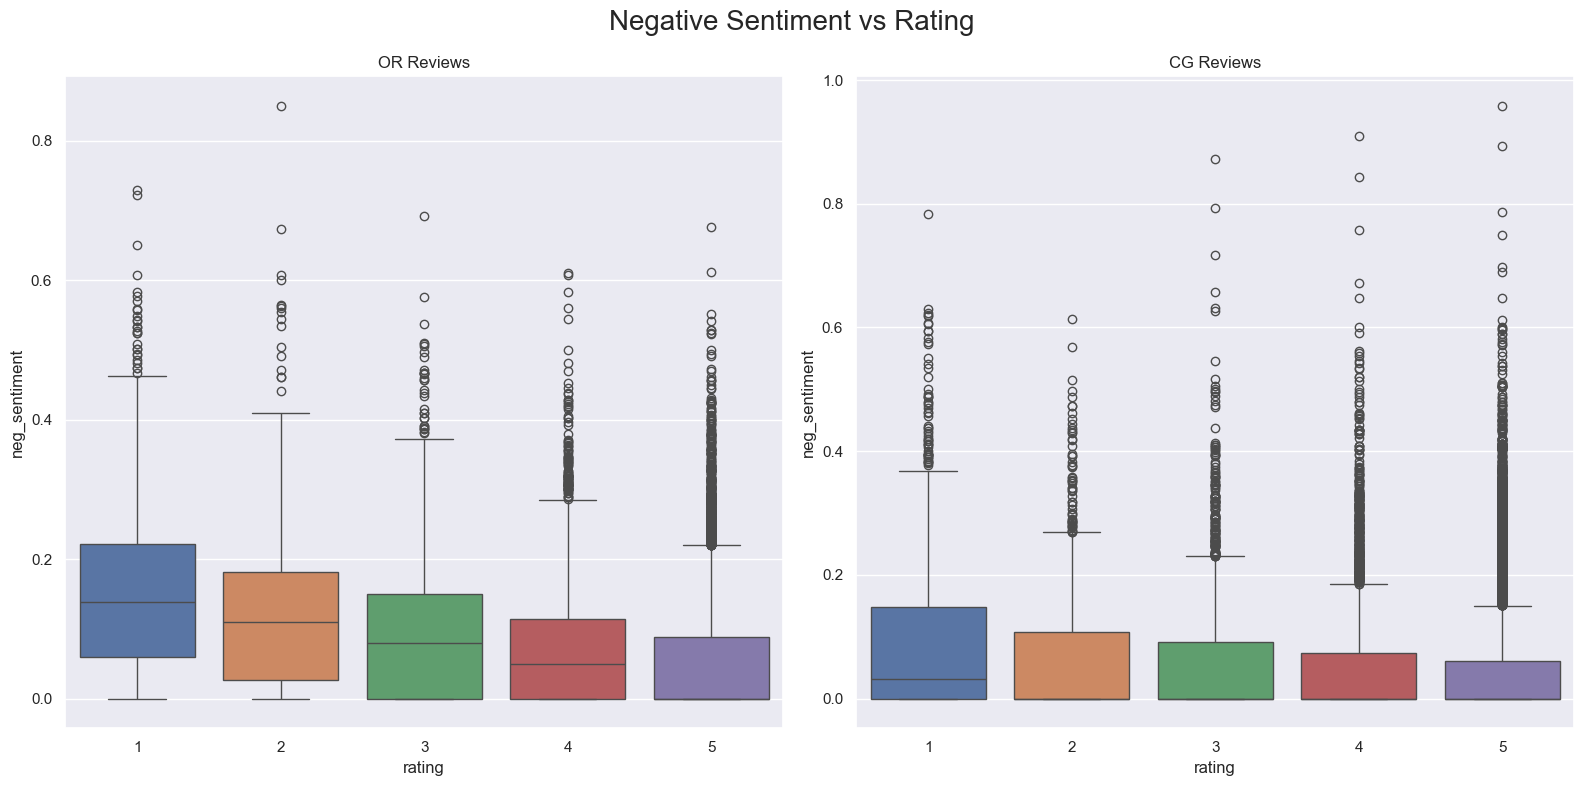

In [45]:
plot_sentiment_by_rating('neg', title='Negative Sentiment vs Rating')

From the plots above, there looks to be a clear difference between how sentiment changes by rating for the CG reviews vs the OR reviews. For example, in the first plot, the compound sentiment much more clearly increases as rating increases for the OR reviews. For the CG reviews, we see a similar trend, but it is not as drastic at all. A similar difference can be seen for the rest of the plots as well (except for neutral maybe). A human seems to be able much better capture the necessary sentiment in their review when compared to a computer.

# Analysis: Predictive Analysis

For our predictive analysis we tried an assortment of models. Below is our code and results for Tree-Based, Naive Bayes, and SVM models.
After each model, we included code for a grid-search of hyper parameters based on cross-fold validation (these are commented out because they each take hours to run)

## Tree Based Models

### Decision Tree Classifier With Bag Of Words

In [36]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews_df['text_no_punct'])

X_train, X_test, y_train, y_test = train_test_split(X, reviews_df['label'], test_size=0.2, random_state=42)

best_bow_params = {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}

clf_bow = DecisionTreeClassifier(**best_bow_params)
clf_bow.fit(X_train, y_train)

dt_pred_bow = clf_bow.predict(X_test)

print(classification_report(y_test, dt_pred_bow))

              precision    recall  f1-score   support

          CG       0.76      0.75      0.76      4016
          OR       0.76      0.77      0.76      4071

    accuracy                           0.76      8087
   macro avg       0.76      0.76      0.76      8087
weighted avg       0.76      0.76      0.76      8087



In [37]:
# pipeline_count = Pipeline([
#     ('vectorizer', CountVectorizer()),
#     ('classifier', DecisionTreeClassifier(random_state=42))
# ])

# param_grid_count = {
#     'vectorizer__max_features': [None, 5000, 10000],
#     'classifier__max_depth': [None, 10, 20, 30],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4]
# }

# grid_search_count = GridSearchCV(pipeline_count, param_grid_count, cv=5)
# grid_search_count.fit(reviews_df['text_no_punct'], reviews_df['label'])
# print(grid_search_count.best_params_)

### Decision Tree Classifier With TF-IDF

In [38]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(reviews_df['text_no_punct'])

X_train, X_test, y_train, y_test = train_test_split(X, reviews_df['label'], test_size=0.2, random_state=42)

best_tfidf_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}

clf_tfidf = DecisionTreeClassifier(**best_tfidf_params)
clf_tfidf.fit(X_train, y_train)

dt_pred_tfidf = clf_tfidf.predict(X_test)

print(classification_report(y_test, dt_pred_tfidf))


              precision    recall  f1-score   support

          CG       0.80      0.76      0.78      4016
          OR       0.77      0.82      0.80      4071

    accuracy                           0.79      8087
   macro avg       0.79      0.79      0.79      8087
weighted avg       0.79      0.79      0.79      8087



In [39]:
# pipeline_tfidf = Pipeline([
#     ('vectorizer', TfidfVectorizer()),
#     ('classifier', DecisionTreeClassifier(random_state=42))
# ])

# param_grid_tfidf = {
#     'vectorizer__max_features': [None, 5000, 10000],
#     'classifier__max_depth': [None, 10, 20, 30],
#     'classifier__min_samples_split': [2, 5, 10],
#     'classifier__min_samples_leaf': [1, 2, 4]

# grid_search_tfidf = GridSearchCV(pipeline_tfidf, param_grid_tfidf, cv=5)
# grid_search_tfidf.fit(reviews_df['text_no_punct'], reviews_df['label'])
# print(grid_search_tfidf.best_params_)
# # }

The decision tree model established a baseline level of performance for our future models. We looked to improve on the model by 1. incorporating common strategies like bagging and boosting 2. engineering new features based on our EDA. The next three models are a reflection of these techniques.

### Light Gradient Boost model

In [40]:
#New features for LGB / XGB / CatBoost models

tfidf_df = pd.DataFrame()

#lemmatize text
tfidf_df['label'] = reviews_df['label']
tfidf_df['lemma_text'] = reviews_df['lemma_text']
tfidf_df['text'] = reviews_df['text'] 
tfidf_df.head()

#extract sentiment
sent_analyzer = SentimentIntensityAnalyzer()
tfidf_df['sentiment'] = reviews_df['lemma_text'].apply(lambda s: sent_analyzer.polarity_scores(s))

#extract positive, neutral, negative, and compound sentiment
tfidf_df['neg_sentiment'] = tfidf_df.sentiment.apply(lambda dc: dc['neg'])
tfidf_df['pos_sentiment'] = tfidf_df.sentiment.apply(lambda dc: dc['pos'])
tfidf_df['neu_sentiment'] = tfidf_df.sentiment.apply(lambda dc: dc['neu'])
tfidf_df['comp_sentiment'] = tfidf_df.sentiment.apply(lambda dc: dc['compound'])

#prepare data for model
tfidf = TfidfVectorizer(sublinear_tf=True, analyzer='word', max_features=2000, tokenizer=word_tokenize)
tfidf_X = tfidf.fit_transform(tfidf_df['lemma_text']).toarray()

tfidf_val_df = pd.DataFrame(tfidf_X, columns=tfidf.get_feature_names_out())

tfidf_val_df['label'] = tfidf_df.label
tfidf_val_df['pos_sentiment'] = tfidf_df['pos_sentiment']
tfidf_val_df['neg_sentiment'] = tfidf_df['neg_sentiment']
tfidf_val_df['neu_sentiment'] = tfidf_df['neu_sentiment']
tfidf_val_df['comp_sentiment'] = tfidf_df['comp_sentiment']
tfidf_val_df['rating_sentiment_diff'] = np.abs(reviews_df['rating'] - tfidf_df['pos_sentiment'] * 5)

tfidf_X = tfidf_val_df.drop(columns=['label'])
y = tfidf_val_df.label
  
X_train, X_test, y_train, y_test = train_test_split(tfidf_X, y, test_size=0.2, random_state=42)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [41]:
# lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss')

# param_grid = {
#     'num_leaves': [31, 63, 127],
#     'max_depth': [-1, 5, 8, 10],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'n_estimators': [100, 200, 500, 800],
# }

# grid_search = GridSearchCV(estimator=lgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_lgb_clf = grid_search.best_estimator_

# print(f'Best Parameters: {best_params}')

# accuracy = best_lgb_clf.score(X_test, y_test)
# print(f'Validation Accuracy: {accuracy}')

In [42]:
best_params= {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 800, 'num_leaves': 63}

lgb_clf = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss', **best_params, verbose=0)

lgb_clf.fit(X_train, y_train)
lgb_pred = lgb_clf.predict(X_test)

print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

          CG       0.89      0.88      0.88      4016
          OR       0.88      0.89      0.89      4071

    accuracy                           0.89      8087
   macro avg       0.89      0.89      0.89      8087
weighted avg       0.89      0.89      0.89      8087



### XGB Model

In [43]:
# Initialize the label encoder
label_encoder = LabelEncoder()

Best_Parameters_XGB= {'colsample_bytree': 0.8, 'gamma': 2, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 0.8}

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost classifier with the best parameters
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    **Best_Parameters_XGB
)

# Train the model
xgb_clf.fit(X_train, y_train_encoded)

# Predict on the test set
y_xgb_pred = xgb_clf.predict(X_test)

# Calculate and print the accuracy
print(classification_report(y_test_encoded, y_xgb_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4016
           1       0.85      0.88      0.86      4071

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



In [44]:
# label_encoder = LabelEncoder()

# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# xgb_clf = XGBClassifier(objective='binary:logistic', use_label_encoder=True, eval_metric='logloss')

# param_grid = {
#     'max_depth': [3, 5, 8, 10],
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         }

# grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
# grid_search.fit(X_train, y_train_encoded)

# best_params = grid_search.best_params_
# best_xgb_clf = grid_search.best_estimator_


# print(f'Best Parameters: {best_params}')
 
# y_pred = best_xgb_clf.predict(X_test)

# accuracy = best_xgb_clf.score(X_test, y_test_encoded)
# print(f'Validation Accuracy: {accuracy}')

### Cat Boost Model

In [45]:
Best_Parameters_CB= {'depth': 8, 'iterations': 800, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

In [46]:
cb_clf = CatBoostClassifier(task_type='CPU', verbose=0, **Best_Parameters_CB)

cb_clf.fit(X_train, y_train)

y_pred = cb_clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          CG       0.88      0.86      0.87      4016
          OR       0.86      0.89      0.88      4071

    accuracy                           0.87      8087
   macro avg       0.87      0.87      0.87      8087
weighted avg       0.87      0.87      0.87      8087



In [47]:
# catboost_clf = CatBoostClassifier(task_type='CPU', verbose=0)

# param_grid = {
#     'depth': [4, 6, 8],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'iterations': [300, 500, 800],
#     'l2_leaf_reg': [3, 5, 7]
# }

# grid_search = GridSearchCV(estimator=catboost_clf, param_grid=param_grid, cv=2, scoring='accuracy', verbose=2)
# grid_search.fit(X_train, y_train)

# best_params = grid_search.best_params_
# best_catboost_clf = grid_search.best_estimator_


# print(f'Best Parameters: {best_params}')

# accuracy = best_catboost_clf.score(X_test, y_test)
# print(f'Validation Accuracy: {accuracy}')

## SVM

In [48]:
svm = SVC(kernel = 'rbf', C=1, verbose=False)
svm.fit(X_train, y_train)
test_preds = svm.predict(X_test)

print(classification_report(y_test, test_preds))


              precision    recall  f1-score   support

          CG       0.87      0.85      0.86      4016
          OR       0.86      0.87      0.86      4071

    accuracy                           0.86      8087
   macro avg       0.86      0.86      0.86      8087
weighted avg       0.86      0.86      0.86      8087



In [54]:
# test_accs = []

# for C in [0.2, 0.5, 0.7, 0.9]:
#     print(f'Started Training C = {C}')
#     svm = SVC(kernel = 'rbf', C=C, verbose=True)
#     svm.fit(X_train, y_train)
#     print('Done Training...Starting to predict...')
#     train_preds = svm.predict(X_train)
#     test_preds = svm.predict(X_test)
    
#     test_accs.append(np.mean((np.array(y_test) == test_preds)))
#     print(f'Test Accuracy: {test_accs[-1]}')
#     print('Done Predicting')
    
#     print(f'Done with C = {C}')
#     print()

## Naive bayes

### Naive Bayes Classifier with Bag of Words

In [55]:

vectorizer_bow_mnb = {'ngram_range': (1, 2)}
vectorizer = CountVectorizer(**vectorizer_bow_mnb)
X = vectorizer.fit_transform(reviews_df['text_no_punct'])
X_train, X_test, y_train, y_test = train_test_split(X, reviews_df['label'], test_size=0.2, random_state=42)

bow_mnb_params = {'alpha': 0.1,}
mnb_bow = MultinomialNB(**bow_mnb_params)
mnb_bow.fit(X_train, y_train)

y_pred_bow_mnb = mnb_bow.predict(X_test)

print(classification_report(y_test, y_pred_bow_mnb))

              precision    recall  f1-score   support

          CG       0.85      0.94      0.90      4016
          OR       0.94      0.84      0.89      4071

    accuracy                           0.89      8087
   macro avg       0.90      0.89      0.89      8087
weighted avg       0.90      0.89      0.89      8087



In [56]:
# X_train, X_test, y_train, y_test = train_test_split(reviews_df['text_no_punct'], reviews_df['label'], test_size=0.2, random_state=42)

# pipeline_count = Pipeline([
#     ('vectorizer', CountVectorizer()),
#     ('classifier', MultinomialNB())
# ])

# param_grid_count = {
#     'vectorizer__max_features': [None, 5000, 10000],
#     'vectorizer__ngram_range': [(1, 1), (1, 2)],
#     'classifier__alpha': [0.1, 1.0, 10.0]
# }

# grid_search_count = GridSearchCV(pipeline_count, param_grid_count, cv=5, n_jobs=-1, verbose=1)
# grid_search_count.fit(X_train, y_train)

# print(grid_search_count.best_params_)

### Naive Bayes Classifier with TF-IDF

In [57]:
tfidf_params = {'ngram_range': (1, 2), 'max_features': 10000}
tfidf = TfidfVectorizer(**tfidf_params)
X_tfidf = tfidf.fit_transform(reviews_df['text_no_punct'])
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, reviews_df['label'], test_size=0.2, random_state=42)

mnb_params = {'alpha': 0.1,}
mnb_tfidf = MultinomialNB(**mnb_params)
mnb_tfidf.fit(X_train, y_train)

y_pred_tfidf_mnb = mnb_tfidf.predict(X_test)

print(classification_report(y_test, y_pred_tfidf_mnb))

              precision    recall  f1-score   support

          CG       0.91      0.89      0.90      4016
          OR       0.89      0.91      0.90      4071

    accuracy                           0.90      8087
   macro avg       0.90      0.90      0.90      8087
weighted avg       0.90      0.90      0.90      8087



In [58]:


# X_train, X_test, y_train, y_test = train_test_split(reviews_df['text_no_punct'], reviews_df['label'], test_size=0.2, random_state=42)

# pipeline_tfidf = Pipeline([
#     ('tfidf', TfidfVectorizer()),
#     ('classifier', MultinomialNB())
# ])

# param_grid_tfidf = {
#     'tfidf__max_features': [None, 5000, 10000],
#     'tfidf__ngram_range': [(1, 1), (1, 2)],
#     'classifier__alpha': [0.1, 1.0, 10.0]
# }

# grid_search_tfidf = GridSearchCV(pipeline_tfidf, param_grid_tfidf, cv=5, n_jobs=-1, verbose=1)
# grid_search_tfidf.fit(X_train, y_train)

# print(grid_search_tfidf.best_params_)

# Ethics & Privacy

Classifying fake reviews can be ethically challenging. The case of a false positive is particularly damaging. For example, if our model errs and marks a true review fake, most people would simply discard that information, thereby invalidating the poster’s speech. Furthermore, websites might delete this review, completely preventing someone from sharing their opinion. This is something that we can account for in our model metrics by valuing precision more than recall. However, we cannot fully eliminate this possibility so we would address this issue directly in our results analysis.

For ethical concerns of our data source, biases in the data could greatly impact our results. For example, if the curator was biased in their data collection, drawing fake reviews from a subset of products more often than others, producers could be adversely affected by our model’s bias. This is something that we would try to ascertain in our EDA stage, and we would address this thoroughly before any statements on our results. Moreover, certain word choices may be penalized heavier than others, which could unduly target geo/cultural groups. To determine this we would have to audit our model. Additionally, there is a privacy concern with the data collection process, as our data will likely be scraped, data consent may be an issue we encounter. This is of utmost importance, thus we must ensure ethically sourced data prior to any model construction.

# Discussion and Conclusion

In conclusion, with a lot of exploratory data analysis, we successfully built a robust model that can identify a human-written review from a computer generated one. To tie this back to our initial goal for this project, we knew that the authenticity of reviews play an important role in customer satisfaction of products and purchasing decisions. With the rise of generative AI, it is highly likely that there will be an increase of fake, generated reviews that could influence how a product, or even an entire company, is perceived. Hence, there is a clear need to distinguish between computer generated and original, human-written reviews to easily identify which reviews are trustworthy and which are not. 

Throughout our analysis, we made numerous different features from reviews to gain a better understanding of distinguishable characteristics between generated and human text.
As hypothesized, there were a lot of clear differences between generated and real reviews we found from our exploratory data analysis. The main features we looked at were Natural Language Processing models like Bag-Of-Words and TF-IDF models that bring a more numerical and computational understanding to the text. Bag-Of-Words and TF-IDF showed the discrepancies in frequencies of words in total counts and the uniqueness of words.  We also delved deeper into more complex features such as sentiment to see if writing/comprehension level or emotion would be telling factors. 

We then fed different combinations of the features we generated into various Machine Learning models, mainly a Naive Bayes Classifier and boosted decision trees like LightGBM, XGBoost, and CatBoost, to see which performed the best. After running cross validation with GridSearchCV, we determined that the best model was a Multinomial Naive Bayes classifier trained with TF-IDF values for both unigrams and bigrams in review text, along with an alpha of 0.1, which resulted in a 90% accuracy on test data. One important takeaway we got from this was that simple models trained with the correct data can produce accurate results with just a little model tuning. 



# Team Contributions

Vikram Venkatesh: Finalized the Hypothesis and Research Question.Wrote team expectations in project proposal. Ran all the T-Tests in EDA with descriptions and generated visualizations. Worked on both of the Decision Tree Models and Naive-Bayes Classifiers and conducted cross validation. Wrote and finalized the conclusion.

Caleb Galdston: Worked on the hypothesis. Contributed to the discussions and refinement of our research question. Organized everything into the final notebooks for all of the checkpoints. Provided explanations for the descriptive analysis and the tests in our EDA. Wrote the abstract.

Nilay Menon: Wrote and finalized background and prior work. Contributed to the discussions and ideas of the research question. Explored different EDA methods such as lemmatization, punctuation removal, and stop word removal. Explored different visualizations such as word clouds and distribution graphs for certain features. Also looked at possible features to use in models such as readability scores and TF-IDF scores. Initially trained naive bayes models with bag of words and TF-IDF.

Vrisan Dubey: Performed EDA including word clouds, sentiment analysis, and sentiment-rating analyis. Engineered features by removing stop-words, punctuation, lemmatizing, tokenizing, and extracting sentiment. Built lightgbm and SVM models and performed grid-search to find the best hyperparameters. Wrote descriptions for each visualization.

Liam Manatt : Found the dataset and wrote the ethics and data privacy guidelines. I also commented on and explained code. Created, trained, and tested CatBoost and XGBoost models, ran cross-fold validation for those models, and compiled the ultimate notebook.

